In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

In [26]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

In [27]:
print(f"Amostra 2019 {dados_2019.shape}")
print(f"Amostra 2020 {dados_2020.shape}")

Amostra 2019 (12339, 6)
Amostra 2020 (14666, 6)


In [28]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [29]:
dados_2020.sample(n=10)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
10408,DF,PNEUMONIA,HOSPITAL,80 - 89,F,355
1754,TO,OUTRAS,VIA_PUBLICA,10 - 19,F,2
5771,MA,INDETERMINADA,DOMICILIO,50 - 59,F,1
6945,AP,INSUFICIENCIA_RESPIRATORIA,OUTROS_SERVICOS_SAUDE,60 - 69,F,2
9051,MG,PNEUMONIA,OUTROS_SERVICOS_SAUDE,70 - 79,F,83
13989,CE,OUTRAS,OUTRO,N/I,M,2
3194,MG,COVID,VIA_PUBLICA,30 - 39,F,1
1750,TO,OUTRAS,HOSPITAL,10 - 19,M,10
10344,CE,PNEUMONIA,AMBULANCIA,80 - 89,M,1
7724,PE,INSUFICIENCIA_RESPIRATORIA,POSTO_SAUDE,60 - 69,M,1


In [30]:
len(dados_2019["uf"].unique())

27

In [31]:
len(dados_2020["uf"].unique())

27

In [32]:
dados_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [33]:
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [34]:
display(dados_2019["tipo_doenca"].value_counts())
dados_2019["tipo_doenca"].value_counts(normalize = True) * 100

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

OUTRAS                        31.072210
PNEUMONIA                     19.053408
INSUFICIENCIA_RESPIRATORIA    18.777859
SEPTICEMIA                    16.678823
INDETERMINADA                 10.511387
SRAG                           3.898209
COVID                          0.008104
Name: tipo_doenca, dtype: float64

In [35]:
display(dados_2020["tipo_doenca"].value_counts())
dados_2020["tipo_doenca"].value_counts(normalize = True) * 100

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

OUTRAS                        25.494341
INSUFICIENCIA_RESPIRATORIA    15.702986
PNEUMONIA                     14.959771
COVID                         14.066548
SEPTICEMIA                    13.589254
INDETERMINADA                  8.911769
SRAG                           7.275331
Name: tipo_doenca, dtype: float64

## Desafio 02 - Nesta aula o Thiago quer fazer uma contagem dos números de casos, mas os dados não parecem corretos. Identifique o problema antes de seguir para o próximo vídeo e ajude a corrigir

In [36]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
display(total_obitos_2019)
teste = total_obitos_2019['total']/total_obitos_2019['total'].sum()*100
teste

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


tipo_doenca
COVID                          0.000086
INDETERMINADA                  0.596955
INSUFICIENCIA_RESPIRATORIA     8.586935
OUTRAS                        56.375025
PNEUMONIA                     19.330934
SEPTICEMIA                    14.981981
SRAG                           0.128084
Name: total, dtype: float64

In [37]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
display(total_obitos_2020)
teste = total_obitos_2020['total']/total_obitos_2020['total'].sum()*100
teste

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


tipo_doenca
COVID                         13.980818
INDETERMINADA                  0.714658
INSUFICIENCIA_RESPIRATORIA     7.357437
OUTRAS                        51.082475
PNEUMONIA                     13.558079
SEPTICEMIA                    12.067335
SRAG                           1.239198
Name: total, dtype: float64

In [38]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


In [39]:
def grafico_comparativo(causa,uf):
    total_2019 = dados_2019[dados_2019["uf"]== uf].groupby('tipo_doenca').sum()
    total_2020 = dados_2020[dados_2020["uf"]== uf].groupby('tipo_doenca').sum()
    lista = [int(total_2019.loc[causa]),int(total_2020.loc[causa])]
    dados = pd.DataFrame({'Total':lista,'Ano':[2019,2020]})
    plt.figure(figsize=(8,6))
    plt.title(f"Número de Óbitos por {causa} no {uf}")
    sns.barplot(x="Ano",y="Total",data=dados)
    plt.show()

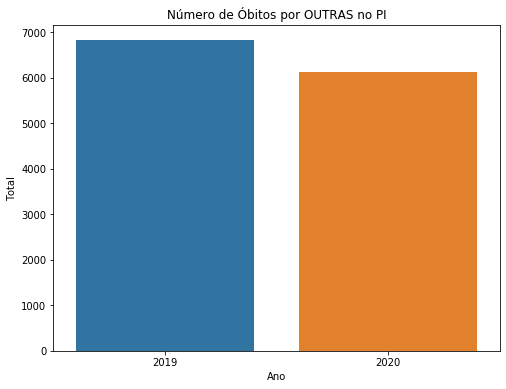

In [40]:
grafico_comparativo('OUTRAS','PI')

In [41]:
def grafico_comparativo_versao_alura(causa,uf="Brasil"):
    if(uf=="Brasil"):
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()
        lista = [int(total_2019.loc[causa]),int(total_2020.loc[causa])]
    else:
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()
        lista = [int(total_2019.loc[uf,causa]),int(total_2020.loc[uf,causa])]
    dados = pd.DataFrame({'Total':lista,'Ano':[2019,2020]})
    plt.figure(figsize=(8,6))
    plt.title(f"Número de Óbitos por {causa} - {uf}")
    sns.barplot(x="Ano",y="Total",data=dados)
    plt.show()

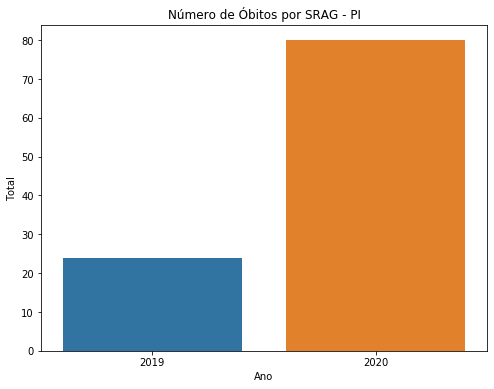

In [42]:
grafico_comparativo_versao_alura("SRAG","PI")

## TAREFA - PARA RETOMAR
Desafio 03 - Nesta análise trabalhamos apenas com a informação de óbito, agora queremos que você explore as outras informações da base de dados para enriquecer mais sua aplicação final. Veja o que descobre de interessante e compartilhe no Discord Desafio

Desafio 06 - A função que melhoramos no vídeo 2.3 da para ficar ainda melhor, agora queremos que você acrescente a opção de selecionar apenas o estado e visualizar os totais de óbitos.


In [45]:
def grafico_comparativo_versao_karol(causa="todas",uf="Brasil"):
    if(uf=="Brasil"):
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()
        if(causa=='todas'):
            lista = [total_2019['total'].sum(),total_2020['total'].sum()]
        else:
            lista = [int(total_2019.loc[causa]),int(total_2020.loc[causa])]
    else:
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()
        if(causa=='todas'):
            lista = [int(total_2019.loc[uf].sum()),int(total_2020.loc[uf].sum())]
        else:
            lista = [int(total_2019.loc[uf,causa]),int(total_2020.loc[uf,causa])]

    dados = pd.DataFrame({'Total':lista,'Ano':[2019,2020]})
    plt.figure(figsize=(8,6))
    plt.title(f"Número de Óbitos por {causa} - {uf}")
    sns.barplot(x="Ano",y="Total",data=dados)
    plt.show()

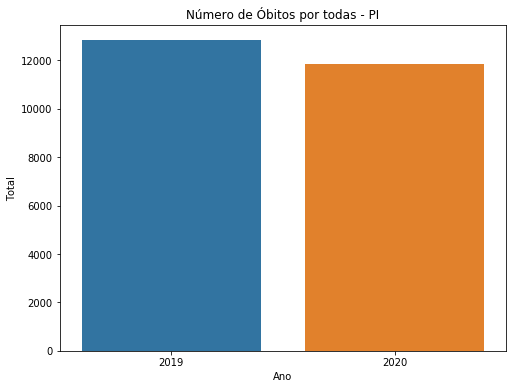

In [46]:
grafico_comparativo_versao_karol(uf="PI")

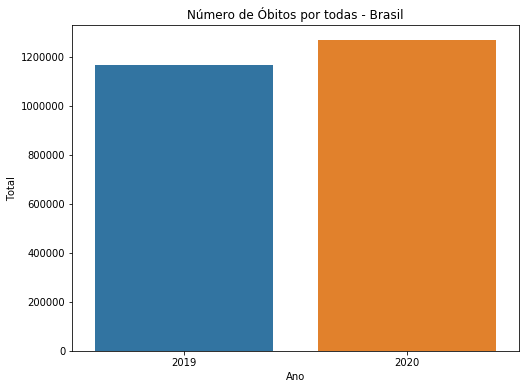

In [47]:
grafico_comparativo_versao_karol()

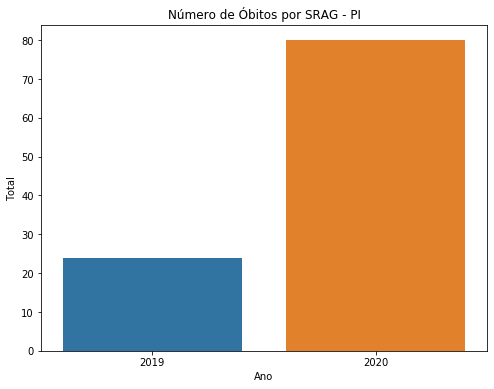

In [48]:
grafico_comparativo_versao_karol("SRAG",uf="PI")

ModuleNotFoundError: No module named 'streamlit'